<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/Travel_Itinerary_Planner_Multi_AI_Agent_JSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. State Graph: The core of our application, defining the flow of our Travel Planner.
2. Planner State: A custom type representing the state of our planning process.
3. Node Functions: Individual steps in our planning process ( input_city, input_interests, create_itinerary)

4 . LLM Integration: Utilizing a language model to generate the final itinerary.

In [6]:
!pip install langchain langchain_core langchain_groq langchain_community langchain

In [7]:
!pip install langgraph

In [8]:
import os
from typing import TypedDict, Annotated, List
from langgraph.graph import StateGraph, END
from langchain_core.messages import HumanMessage, AIMessage
from langchain_core.prompts import ChatMessagePromptTemplate,ChatPromptTemplate
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import display, Image
from langchain_groq import ChatGroq

Define Agent

In [9]:
class PlannerState(TypedDict):
  messages : Annotated[List[HumanMessage | AIMessage], "the messages in the conversation"]
  city: str
  interests: List[str]
  itinerary:str

In [10]:
#Load groq api key from userdata colab
from google.colab import userdata
os.environ["GROQ_API_KEY"] = userdata.get('groq_api_key')

In [11]:

llm = ChatGroq(
    temperature=0,
    model_name= "llama-3.3-70b-versatile"
)

result = llm.invoke("What is Multi AI Agent?")
result.content

'A Multi-Agent System (MAS) is a system composed of multiple intelligent agents that interact with each other and their environment to achieve common or individual goals. In the context of artificial intelligence (AI), a Multi-AI Agent refers to a system that consists of multiple AI agents that work together to solve complex problems, make decisions, or perform tasks.\n\nCharacteristics of Multi-AI Agents:\n\n1. **Autonomy**: Each AI agent has its own autonomy to make decisions and take actions.\n2. **Interactions**: AI agents interact with each other, sharing information, coordinating actions, and negotiating goals.\n3. **Distributed problem-solving**: Multiple AI agents work together to solve complex problems that are difficult or impossible for a single agent to solve.\n4. **Decentralized decision-making**: Decision-making is distributed among the AI agents, allowing for more flexible and adaptive problem-solving.\n\nTypes of Multi-AI Agents:\n\n1. **Cooperative Agents**: Agents wor

In [12]:
itinerary_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful travel assistant. Create a day trip itinerary for {city} based on the user's interests: {interests}. Provide a brief, bulleted itinerary."),
    ("user", "Create an itinerary for my day trip.")
])

Define Agent Function

In [13]:
def input_city(state:PlannerState)->PlannerState:
  print("Please enter the city you want to visit for your day trip:")
  user_message = input("Your Input:")
  return{
      **state,
      "city":user_message,
      "messages":state["messages"]+[HumanMessage(content=user_message)]
  }

def input_interest(state:PlannerState)->PlannerState:
  print(f"Please enter your interest for the trip to: {state['city']} (comma-separated):")
  user_message = input("Your Input:")
  return{
      **state,
      "interest":[interest.strip() for interest in user_message.split(",")],
      "messages":state['messages']+[HumanMessage(content=user_message)]
  }

def create_itinerary(state:PlannerState)->PlannerState:
  print(f"Creating an itinerary for your day trip to {state['city']} based on interests: {', '.join(state['interests'])}")
  response=llm.invoke(itinerary_prompt.format_messages(city=state['city'], interests=', '.join(state['interests'])))
  print("Final Itinerary:")
  print(response.content)
  return{
      **state,
      "messages":state['messages']+[AIMessage(content=response.content)],
      "itinerary":response.content,
  }

Create and Compile the Graph

In [14]:
workflow = StateGraph(PlannerState)

workflow.add_node("input_city",input_city)
workflow.add_node("input_interest",input_interest)
workflow.add_node("create_itinerary",create_itinerary)

workflow.set_entry_point("input_city")

workflow.add_edge("input_city","input_interest")
workflow.add_edge("input_interest","create_itinerary")
workflow.add_edge("create_itinerary",END)

app = workflow.compile()

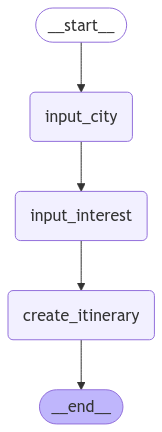

In [15]:
display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API
        )
    )
)

Define the function thats run the graph

In [16]:
def travel_planner(user_request:str):
  print(f"Initial Request: {user_request}\n")
  state={
      "messages":HumanMessage(content=user_request),
      "city":"",
      "interests":[],
      "itinerary":"",
  }

  for ouput in app.stream(state):
    pass

In [17]:
user_request = "I want to plan a day trip"
travel_planner(user_request)

Initial Request: I want to plan a day trip

Please enter the city you want to visit for your day trip:
Your Input:Hyderabad
Please enter your interest for the trip to: Hyderabad (comma-separated):
Your Input:Tank Bund Arae
Creating an itinerary for your day trip to Hyderabad based on interests: 
Final Itinerary:
Since you didn't specify any particular interests, I'll create a general itinerary that covers a mix of history, culture, and entertainment in Hyderabad. Here's a brief, bulleted itinerary for your day trip:

* 9:00 AM - 10:00 AM: Visit the Charminar, a historic monument and iconic symbol of Hyderabad
* 10:30 AM - 12:00 PM: Explore the Laad Bazaar, a traditional market filled with colorful bangles, jewelry, and handicrafts
* 12:30 PM - 1:30 PM: Have lunch at a local restaurant, trying some of Hyderabad's famous biryani and other cuisine
* 2:00 PM - 4:00 PM: Visit the Salar Jung Museum, which showcases a vast collection of art and artifacts from around the world
* 5:00 PM - 6:30

In [18]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 103.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [19]:
import gradio as gr
from typing import TypedDict, Annotated, List
from langgraph.graph import StateGraph, END
from langchain_core.messages import HumanMessage, AIMessage
from langchain_core.prompts import ChatMessagePromptTemplate, ChatPromptTemplate

# Define the PlannerState type
class PlannerState(TypedDict):
    messages: Annotated[List[HumanMessage | AIMessage], "The messages in the conversation"]
    city: str
    interests: List[str]
    itinerary: str

# Define the LLM
llm = ChatGroq(
    temperature=0,
    model_name="llama-3.3-70b-versatile"
)

# Define the prompt
itinerary_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful travel assistant. Create a day trip itinerary for {city} based on the user's interests: {interests}. Provide a brief, bulleted itinerary."),
    ("user", "Create an itinerary for my day trip.")
])

# Define the state processing functions
def input_city(state: PlannerState) -> PlannerState:
    print("Please enter the city you want to visit for your day trip:")
    user_message = input("Your Input: ")
    return {
        **state,
        "city": user_message,
        "messages": state["messages"] + [HumanMessage(content=user_message)]
    }

def input_interest(state: PlannerState) -> PlannerState:
    print(f"Please enter your interests for the trip to {state['city']} (comma-separated):")
    user_message = input("Your Input: ")
    return {
        **state,
        "interests": [interest.strip() for interest in user_message.split(",")],
        "messages": state["messages"] + [HumanMessage(content=user_message)]
    }

def create_itinerary(state: PlannerState) -> PlannerState:
    print(f"Creating an itinerary for your day trip to {state['city']} based on interests: {', '.join(state['interests'])}")
    response = llm.invoke(itinerary_prompt.format_messages(city=state['city'], interests=', '.join(state['interests'])))
    print("Final Itinerary:")
    print(response.content)
    return {
        **state,
        "messages": state["messages"] + [AIMessage(content=response.content)],
        "itinerary": response.content,
    }

# Define the Gradio application
def travel_planner(city: str, interests: str):
    # Initialize the state
    state: PlannerState = {
        "messages": [],
        "city": "",
        "interests": [],
        "itinerary": "",
    }

    # Process the inputs
    state["city"] = city
    state["interests"] = [interest.strip() for interest in interests.split(",")]

    # Generate itinerary
    state = create_itinerary(state)

    return state["itinerary"]

interface = gr.Interface(
    fn=travel_planner,
    theme="huggingface",
    inputs=[
        gr.Textbox(label="Enter the city for your day trip"),
        gr.Textbox(label="Enter Your Interests (Comma-Separated)"),
    ],
    outputs=gr.Textbox(label="Generated Itinerary"),  # Corrected to 'outputs'
    title="Travel Itinerary Planner",
    description="Enter the city and interests to generate a personalized day trip travel itinerary.",
)

# Launch the Gradio interface
interface.launch()

/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:1049: UserWarning: Cannot load huggingface. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/huggingface (Request ID: Root=1-676b9311-5b75eebd4e24c6c7417e80c1;872b3013-1a3d-4193-a860-b1eca1218662)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://37f7cd6c6eccde906b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


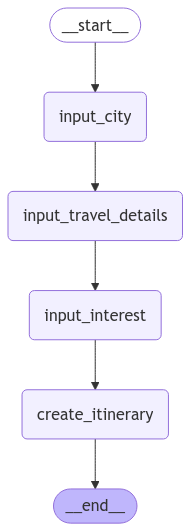

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d414421dc66360a767.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [20]:
import os
from typing import TypedDict, Annotated, List
from langgraph.graph import StateGraph, END
from langchain_core.messages import HumanMessage, AIMessage
from langchain_core.prompts import ChatMessagePromptTemplate, ChatPromptTemplate
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import display, Image
from langchain_groq import ChatGroq

class PlannerState(TypedDict):
    messages: Annotated[List[HumanMessage | AIMessage], "the messages in the conversation"]
    city: str
    interests: List[str]
    itinerary: str
    budget: str
    traveler: str
    no_of_days: int

# Load groq API key from user data (specific to Google Colab environment)
from google.colab import userdata
os.environ["GROQ_API_KEY"] = userdata.get('groq_api_key')

llm = ChatGroq(
    temperature=0,
    model_name="llama-3.3-70b-versatile"
)

# Define the updated prompt for itinerary creation
itinerary_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful travel assistant. Generate a comprehensive travel plan in JSON format."),
    ("user", "Generate Travel Plan for Location: {city} for {no_of_days} days for {traveler} with a {budget} budget. "
             "Provide hotel options with fields: HotelName, HotelAddress, Price, HotelImageUrl, GeoCoordinates, Rating, Descriptions. "
             "Suggest itinerary with fields: PlaceName, PlaceDetails, PlaceImageUrl, GeoCoordinates, TicketPricing, TimeToTravel, BestTimeToVisit, DayPlan.")
])

def input_city(state: PlannerState) -> PlannerState:
    print("Please enter the city you want to visit:")
    user_message = input("Your Input: ")
    return {
        **state,
        "city": user_message,
        "messages": state["messages"] + [HumanMessage(content=user_message)]
    }

def input_travel_details(state: PlannerState) -> PlannerState:
    print("Please enter the number of days for the trip:")
    no_of_days = int(input("Your Input: "))

    print("Please enter the type of traveler (e.g., solo, couple, family, group):")
    traveler = input("Your Input: ")

    print("Please enter your budget (e.g., low, medium, high):")
    budget = input("Your Input: ")

    return {
        **state,
        "no_of_days": no_of_days,
        "traveler": traveler,
        "budget": budget,
        "messages": state["messages"] + [
            HumanMessage(content=f"Number of days: {no_of_days}, Traveler type: {traveler}, Budget: {budget}")
        ]
    }

def input_interest(state: PlannerState) -> PlannerState:
    print(f"Please enter your interests for the trip to: {state['city']} (comma-separated):")
    user_message = input("Your Input: ")
    return {
        **state,
        "interests": [interest.strip() for interest in user_message.split(",")],
        "messages": state["messages"] + [HumanMessage(content=user_message)]
    }

def create_itinerary(state: PlannerState) -> PlannerState:
    print(f"Creating a detailed itinerary for {state['city']}...")
    response = llm.invoke(
        itinerary_prompt.format_messages(
            city=state['city'],
            no_of_days=state['no_of_days'],
            traveler=state['traveler'],
            budget=state['budget']
        )
    )
    print("Generated Itinerary:")
    print(response.content)
    return {
        **state,
        "messages": state["messages"] + [AIMessage(content=response.content)],
        "itinerary": response.content
    }

workflow = StateGraph(PlannerState)

workflow.add_node("input_city", input_city)
workflow.add_node("input_travel_details", input_travel_details)
workflow.add_node("input_interest", input_interest)
workflow.add_node("create_itinerary", create_itinerary)

workflow.set_entry_point("input_city")

workflow.add_edge("input_city", "input_travel_details")
workflow.add_edge("input_travel_details", "input_interest")
workflow.add_edge("input_interest", "create_itinerary")
workflow.add_edge("create_itinerary", END)

app = workflow.compile()
display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API
        )
    )
)

def travel_planner(user_request: str):
    print(f"Initial Request: {user_request}\n")
    state = {
        "messages": [HumanMessage(content=user_request)],
        "city": "",
        "interests": [],
        "itinerary": "",
        "budget": "",
        "traveler": "",
        "no_of_days": 0
    }

    for output in app.stream(state):
        pass

import gradio as gr

def travel_planner_interface(city: str, interests: str, no_of_days: int, traveler: str, budget: str):
    state: PlannerState = {
        "messages": [],
        "city": city,
        "interests": [interest.strip() for interest in interests.split(",")],
        "itinerary": "",
        "budget": budget,
        "traveler": traveler,
        "no_of_days": no_of_days
    }

    # Generate itinerary
    state = create_itinerary(state)

    return state["itinerary"]

interface = gr.Interface(
    fn=travel_planner_interface,
    inputs=[
        gr.Textbox(label="Enter the city for your trip"),
        gr.Textbox(label="Enter Your Interests (Comma-Separated)"),
        gr.Number(label="Number of Days"),
        gr.Textbox(label="Traveler Type (e.g., solo, couple, family)"),
        gr.Textbox(label="Budget (e.g., low, medium, high)")
    ],
    outputs=gr.Textbox(label="Generated Travel Plan (JSON Format)"),
    title="Comprehensive Travel Itinerary Planner",
    description="Generate a detailed travel itinerary with hotel and sightseeing suggestions in JSON format."
)

interface.launch()
